<IPython.core.display.Javascript object>


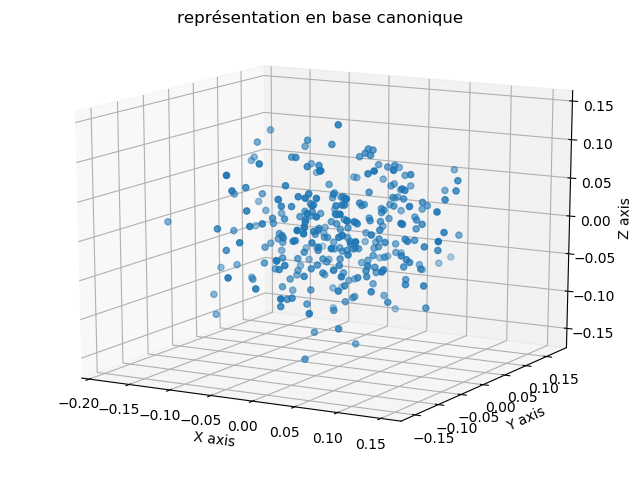

<IPython.core.display.Javascript object>


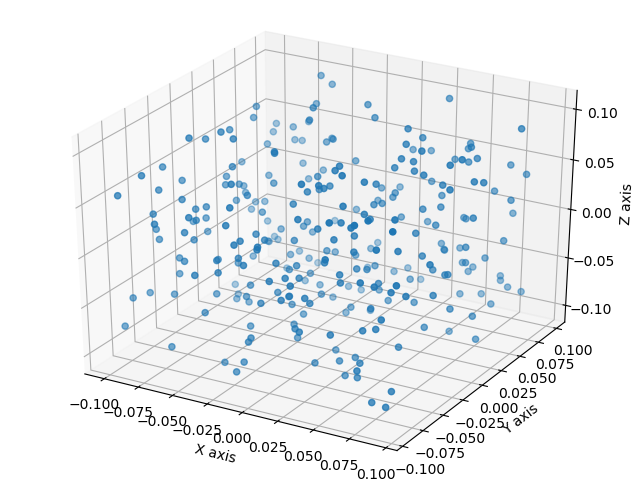

In [4]:
import fileloader as fl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

n=300 # nombre de données par pays
d=32 # nombre de pays


A=fl.fileloader("data.csv") # la matrice de données de taille (n x d) chargé par fileloader.py

J=np.matrix((1/n)* np.ones((n,n))) # la matrice de taille n dont tous les coeff valent 1/n

I=np.matrix(np.eye(n)) # la matrice identité de taille n

D=np.zeros((d,d)) # matrice nulle de taille d

E=np.matrix(np.eye(d)) # matrice identité de taill d

X=(I-J)*A  # la matrice de données centralisées. On a enlevé la moyenne de chaque variable.
           # la matrice contenant les moyenne est J*M c'est l'interet du 1/n dans les coeff de J.


# Calcul des variances pour réduire les données à une variance 1.

for i in range(d):
    D[i][i]=  1/np.sqrt(np.sum(np.array(X[:,i])**2))

# D est une matrice diagonale dont chaque coeff Dii contient l'inverse de l'écrat type de la variable i (variable i = colone i de la mtrice M)


X=X*np.matrix(D) # là on a réduit les variables à une variance 1 par multiplication par D.


V=[]

for i in range(d):
    V.append(np.squeeze(np.asarray(X[:,i])))



Sigma=np.zeros((d,d))




for x in X:
    Sigma+=x.transpose()*x
    

valA, vecA = np.linalg.eig(Sigma)




E1,E2,E3=[],[],[]
U1,U2,U3=[],[],[]

#les 3 premiers vecteur de la base canonique en dimension d
e1=np.matrix(E[0])
e2=np.matrix(E[1])
e3=np.matrix(E[2])

#les trois vecteur de la base de diagonalisation de A qui ont les plus grandes valeurs propres
u1=np.matrix(vecA[0])
u2=np.matrix(vecA[1])
u3=np.matrix(vecA[2])


# projections sur les deux familles de vecteurs u et e.
for x in X:
       U1.append(float(u1*np.transpose(x)))  # abscisse en base de diagonalisation
       U2.append(float(u2*np.transpose(x)))  # ordonné en base de diagonalisation
       U3.append(float(u3*np.transpose(x)))  # cote en base de diagonalisation
       
       E1.append(float(e1*np.transpose(x)))  # abscisse en base de canonique
       E2.append(float(e2*np.transpose(x)))   # ordonné en base de canonique
       E3.append(float(e3*np.transpose(x)))   # cote en base de canonique



# Figure dans l'espace.

fig1 = plt.figure() # dans la base de diagonalisation de A
fig1.suptitle('Représentation en base de PCA')

fig2 = plt.figure() # dans la base canonique.
fig1.suptitle('représentation en base canonique')



ax1 = Axes3D(fig1)
#ax1.title("représentation en base de PCA")

ax2 = Axes3D(fig2)
#ax2.title("représentation en base canonique")


ax1.set_xlabel('X axis')
ax1.set_ylabel('Y axis')
ax1.set_zlabel('Z axis')    



ax2.set_xlabel('X axis')
ax2.set_ylabel('Y axis')
ax2.set_zlabel('Z axis')


ax2.scatter(E1, E2, E3)
ax1.scatter(U1, U2, U3)

